# Financial Fraud Detection with Random Forest Classifier

In this notebook, we'll explore the task of financial fraud detection using a Random Forest classifier.

We'll start by loading a preprocessed dataset containing features related to financial transactions, along with a target variable indicating whether each transaction is fraudulent or not. We'll then preprocess the data, including encoding categorical variables and handling class imbalance using Synthetic Minority Over-sampling Technique (SMOTE).

Next, we'll train a Random Forest classifier using grid search cross-validation to find the optimal hyperparameters. We'll evaluate the model's performance using various metrics such as precision, recall, F1-score, and confusion matrix. Additionally, we'll visualize the model's performance using precision-recall curves and heatmap representations of the confusion matrix.

Through this analysis, we aim to develop a robust model for financial fraud detection that can accurately classify transactions and assist in mitigating the risks associated with fraudulent activities.


### Relevant Imports

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import (f1_score, recall_score, precision_score,
                             precision_recall_curve, precision_recall_fscore_support,
                             classification_report, confusion_matrix)
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme('notebook')

### Loading the dataset

In [2]:
file = r'fin_data_processed.csv'
df_encoded = pd.read_csv(file)

df_encoded.head(10)

,time_of_day_EarlyMorning,time_of_day_Evening,time_of_day_LateAfternoon,time_of_day_LateMorning,time_of_day_LateNight,time_of_day_Morning,time_of_day_Night,cred_type_Credit Card,cred_type_Debit Card,cred_type_Home Loan,...,error_code_U90,error_code_U91,error_code_U92,error_code_U93,error_code_U94,error_code_U96,payee_requested_amount,payee_settlement_amount,difference_amount,targets
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0.130872,0.046728,0.200272,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-0.432866,-0.459216,0.200272,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-0.939230,-0.913669,0.200272,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.407328,0.294842,0.200272,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.772327,0.622422,0.200272,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-1.195757,-1.143897,0.200272,0
6,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0.703437,0.560595,0.200272,0
7,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1.429297,1.212041,0.200272,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1.672791,1.430572,0.200272,0
9,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,-1.377188,-1.306728,0.200272,1


### Processing the dataset to feed to the model

Separating inputs (X) and targets (y)

In [3]:
inputs, targets = df_encoded.iloc[:, :-1], df_encoded.iloc[:, -1]

Since there is imbalance, use SMOTE to create a balance in the dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size= 0.2, random_state= 42, stratify= targets)

print(f"Total targets: {len(y_train)}\nFraudulent targets: {y_train.sum()}")

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"After SMOTE\nTotal targets: {len(y_train_smote)}\nFraudulent targets: {y_train_smote.sum()}")

Total targets: 44536
Fraudulent targets: 2868
After SMOTE
Total targets: 83336
Fraudulent targets: 41668


### Random Forest Classifier

Model and training

In [7]:
rfc_model = RandomForestClassifier(random_state= 42, class_weight= None, verbose= 1, n_jobs= 2)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30]
}

grid_search_rf = GridSearchCV(
    rfc_model,
    param_grid= param_grid,
    cv= KFold(n_splits=5, random_state= 42, shuffle= True),
    scoring= 'f1'
)

grid_search_rf.fit(X_train_smote, y_train_smote)

best_model_rf = grid_search_rf.best_estimator_

print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best accuracy: {grid_search_rf.best_score_}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    6.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.8s
[Parallel(n_job

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best accuracy: 0.8937964465338017


[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:   16.2s finished


Testing the model

In [8]:
y_pred = best_model_rf.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished


Evaluation of model's performance on test data

In [10]:
# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
precision_recall_fs = precision_recall_fscore_support(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"F1 Score: {np.round(f1, 3)}")
print(f"Recall: {np.round(recall, 3)}")
print(f"Precision: {np.round(precision, 3)}")


Evaluation Metrics:
F1 Score: 0.662
Recall: 0.854
Precision: 0.541


In [11]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     10418
           1       0.54      0.85      0.66       717

    accuracy                           0.94     11135
   macro avg       0.77      0.90      0.82     11135
weighted avg       0.96      0.94      0.95     11135



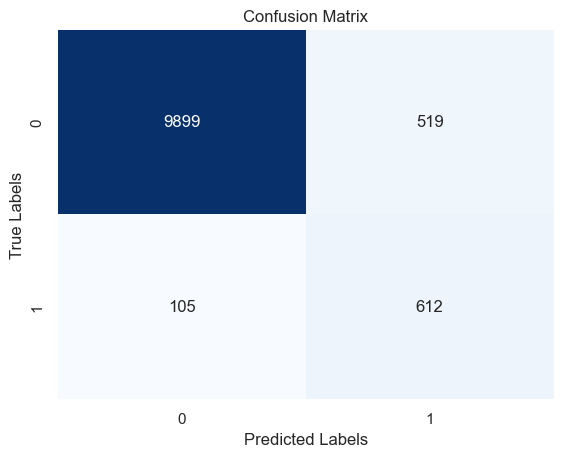

In [12]:
# Plot confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.set_theme(style="whitegrid", palette="pastel")
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

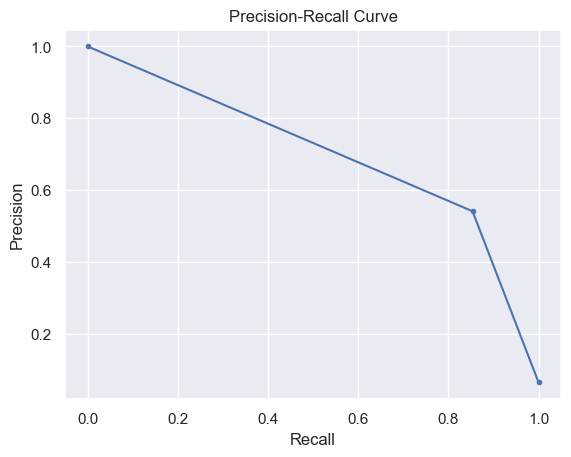

In [16]:
# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [18]:
# Calculate precision, recall, F1-score, and support for each class
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Class': range(len(precision)),
    'Precision': precision,
    'Recall': recall,
    'F1-Score': fscore,
    'Support': support
})

# Set the class labels if available
if hasattr(best_model_rf, 'classes_'):
    class_labels = best_model_rf.classes_
    metrics_df['Class'] = class_labels

# Display the DataFrame
print("Evaluation Metrics by Class:")
metrics_df

Evaluation Metrics by Class:


,Class,Precision,Recall,F1-Score,Support
0,0,0.989504,0.950182,0.969445,10418
1,1,0.541114,0.853556,0.662338,717


In [19]:
print(conf_matrix)

[[9899  519]
 [ 105  612]]


## Conclusion

In this notebook, we trained a Random Forest classifier to predict the target variable based on the input features. Here's a summary of our findings and key takeaways:

### Model Performance:

- **Classification Report**: We evaluated the model's performance using a classification report, which provides detailed metrics such as precision, recall, F1-score, and support for each class. The classification report revealed:

    - **Precision**: Precision measures the accuracy of positive predictions. A high precision indicates that the model correctly identifies positive instances with few false positives. For example, the precision for class 0 (negative class) is 0.99, indicating that 99% of instances predicted as class 0 are actually class 0. The precision for class 1 (positive class) is 0.54, meaning that 54% of instances predicted as class 1 are actually class 1.

    - **Recall**: Recall, also known as sensitivity, measures the ability of the classifier to correctly identify positive instances. A high recall indicates that the model captures most positive instances without missing many. For example, the recall for class 0 is 0.95, indicating that 95% of actual class 0 instances are correctly identified. The recall for class 1 is 0.85, meaning that 85% of actual class 1 instances are correctly identified.

    - **F1-score**: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is useful when the class distribution is imbalanced. For example, the F1-score for class 0 is 0.97, indicating a high level of precision and recall. The F1-score for class 1 is 0.66, suggesting a trade-off between precision and recall.

- **Confusion Matrix**: The confusion matrix provided a detailed breakdown of the model's predictions compared to the actual labels. It includes metrics such as true positive (TP), true negative (TN), false positive (FP), and false negative (FN) counts. For example, there are 612 true positive instances and 9899 true negative instances. However, there are also 519 false positive instances and 105 false negative instances, highlighting areas for potential improvement in the model's performance.

### Evaluation Metrics:

- **F1 Score**: The overall F1-score of the model is 0.662, indicating a balance between precision and recall.

- **Recall**: The overall recall of the model is 0.854, suggesting that it performs well in identifying positive instances.

- **Precision**: The overall precision of the model is 0.541, indicating that it is less accurate in predicting positive instances compared to negative instances.

### Conclusion:

Overall, the Random Forest classifier shows promising performance in classifying the target variable. However, further optimization may be required to improve the model's performance, especially in correctly classifying positive instances. By iteratively refining the model and incorporating feedback from evaluation metrics, we can continue to enhance its predictive capabilities.

Moving forward, we can explore additional techniques such as feature engineering, model ensembles, or advanced algorithms to further improve the model's performance and address any remaining challenges.


# END OF DOCUMENT